In [ ]:
# Solution 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = "https://raw.githubusercontent.com/armoutihansen/EEMP2020/main/datasets/Employee_data.csv"

df = pd.read_csv(path_to_data)

In [ ]:
# Solution 2
X = df.drop(columns=['Attrition'])
X = pd.get_dummies(X)
y = df['Attrition']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=181)

In [ ]:
# Solution 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'min_samples_split': np.arange(10,100),
              'min_samples_leaf': np.arange(10,100),
              'max_depth': np.arange (5,20),
              'max_features': np.arange(1,20)}
dt_grid = RandomizedSearchCV(DecisionTreeClassifier(),
                        param_grid, cv=5, scoring='neg_log_loss', n_iter=100)
dt_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
# Solution 4
from sklearn.metrics import accuracy_score

pred = dt_grid.predict(X_test)

print('accuracy: ', accuracy_score(pred, y_test))

accuracy:  0.8260869565217391


In [ ]:
y_test.describe()

count     368
unique      2
top        No
freq      304
Name: Attrition, dtype: object

In [ ]:
304/368

0.8260869565217391

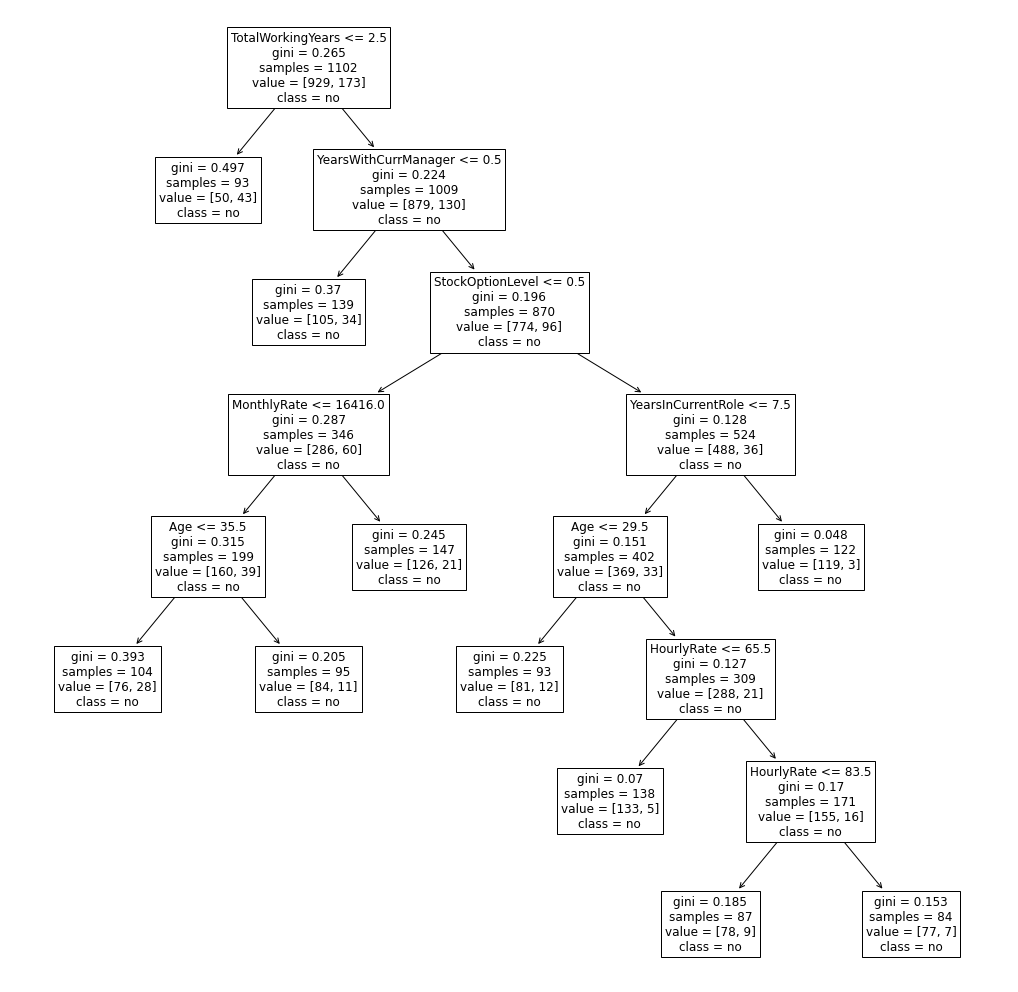

In [ ]:
# Solution 5
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 18))
tree.plot_tree(dt_grid.best_estimator_, feature_names=X_train.columns,
class_names=['no', 'yes'], fontsize=12);

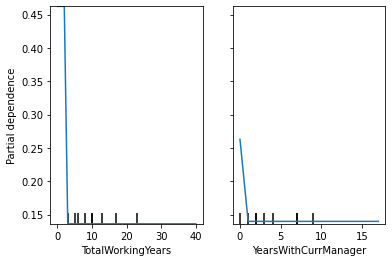

In [ ]:
# Solution 5
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(dt_grid, X_train, ['TotalWorkingYears', 'YearsWithCurrManager'])